## PART 3: Gaussian Pulse

Let's try a more interesting source:
$$
p(t) = e^{-\left( \frac{t-t_0}{\tau} \right)^2}.
$$

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.constants import c,pi,mu_0,epsilon_0
from Luis_Functions import FourierThis

In [2]:
freq = 3e9
w = 2*pi*freq

L_T = 2
N_l = 100

wavelength = c/freq
dz1 = wavelength/N_l
N_T = round(L_T/dz1)+1
dz = L_T/N_T

print("Wavelength = ", wavelength)
print("N_T = ", N_T)
print("d_z = ", dz)

Wavelength =  0.09993081933333334
N_T =  2002
d_z =  0.000999000999000999


In [3]:
#Gaussian pulse parameters
bw = 1.5e9; #Aprox
tau = 1/bw;
t0 = 2*tau;

In [4]:
S = 0.5
dt = S*dz/c
dt = min([S*dz/c, tau/20])
print(dt)

print(t0/dt)

1.666154321669091e-12
800.2460012213334


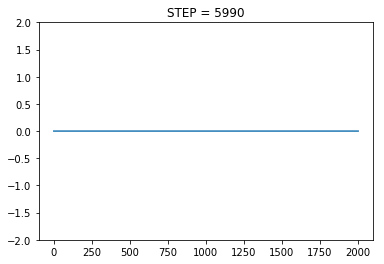

In [5]:
#Number of time steps
STEPS = 6000

#Initialize fields
ey = np.zeros(N_T+1)
hx = np.zeros(N_T)

#Initialize boundary conditions
ey_0_2 = 0
ey_0_1 = 0
ey_N_2 = 0
ey_N_1 = 0
    
#Location of source    
k_source = 50

#location of probe
k_probe = N_T-10
ey_probe = np.zeros(STEPS)

#Initialize dynamic figure
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.canvas.draw()

#Update factors
alpha_h = dt/(dz*mu_0)
alpha_e = dt/(dz*epsilon_0)

for n in range(0,STEPS):

    #for k in range(0,N_T):
    hx = hx +  alpha_h*(ey[1:]-ey[:N_T])

    #for k in range(1,N_T):
    ey[1:N_T] = ey[1:N_T] + alpha_e*(hx[1:] - hx[:N_T-1])

    #Apply source
    ey[k_source] = ey[k_source] + np.sin(w*n*dt)*np.exp(-((n*dt-t0)/tau)**2)
    
    #Apply old boundary condition
    ey[0] = ey_0_2
    ey[N_T] = ey_N_2
    
    #Save boundary condition
    ey_0_2 = ey_0_1
    ey_0_1 = ey[1]
    ey_N_2 = ey_N_1
    ey_N_1 = ey[N_T-1]
    
    #Save field at probe location
    ey_probe[n] = ey[k_probe]
    
    if n%10==0:
        ax.clear()
        ax.plot(ey)
        ax.axes.set_ylim(-2,2)
        ax.set_title('STEP = %i' % n)
        fig.canvas.draw()
        time.sleep(0.001)


[  0.00000000e+00   1.46529419e+08   2.93058838e+08 ...,   2.99799192e+11
   2.99945721e+11   3.00092250e+11]


Text(0.5,15,'GHz')

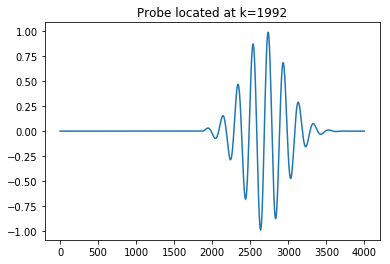

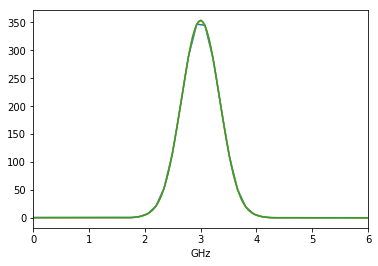

In [12]:
x = ey_probe[2000:]

fig = plt.figure()
ax = fig.add_subplot(111)
fig.canvas.draw()
ax.plot(x)
ax.set_title('Probe located at k=%i' % k_probe)
fig.canvas.draw()

NFFT = 1024*4
X1, freqs1 = FourierThis(x,dt,NFFT,N=1)
X2, freqs2 = FourierThis(x,dt,NFFT,N=2)
X4, freqs4 = FourierThis(x,dt,NFFT,N=4)
print(freqs1)

fig = plt.figure()
ax = fig.add_subplot(111)
fig.canvas.draw()

ax.plot(freqs1*1e-9, np.abs(X1))
ax.plot(freqs2*1e-9, np.abs(X2))
ax.plot(freqs4*1e-9, np.abs(X4))

ax.set_xlim(0,6)
ax.set_xlabel('GHz')

Let's check the energy of the pulse in time and frequency domains:

In [34]:
xt = x
Xf = X1

energy_t = np.sum(xt**2)*dt
N = len(xt)
Xf= np.abs(Xf)*dt
energy_f = (Xf[0]**2 + 2*np.sum(Xf[1:]**2))/(N*dt)

print("N = ", N)
print("E_t = ", energy_t)
print("E_f = ", energy_f)

N =  4000
E_t =  4.18238839294e-10
E_f =  4.28276571437e-10
